# COVID-19 STATISTICS IN THE UNITED STATES AND ITS IMPACT
### JEREMY PREM

## Introduction 
The purpose of this project is to conceptualize and visualize the numbers behind the COVID-19 pandemic in the United States. To do this I am going to be visualizing and analyzing various COVID-19 related statistics, in order to put reasoning behind the numbers. On January 30, 2020, COVID-19 was declared a public health emergency, by March 11, 2020 it was declared a pandemic, and by March 15th the country was on lockdown. As those who experienced it will say, it trully was an unprecedented time, as the last pandemic of this scale was the Influenza pandemic in 1918. Governments and healthcare systems faced challenges never before seen at this level, attempting to contain the virus's spread, while researchers and scientists worked vigilantly to create effective treatments and a vaccine. The COVID-19 pandemic changed the world for better or worse, it impacted healthcare systems, society, politics, the way humanity viewed day to day life, it even shaped an entire generation. 

While some people may say that it is better to leave the pandemic in the past and not to look at it anymore, it would be remiss if we did not learn from this experience. In the post pandemic world, we still feel the affects it had on society, the analysis of COVID-19 is crucial to understanding the course of the pandemic, seeing how it impacted current events, and how current events impacted it. During 2020 alone, the United States was subject to significant social events like the [protests regarding racism and police brutality](https://en.wikipedia.org/wiki/George_Floyd_protests), record breaking [wildfires in the western US](https://www.fire.ca.gov/incidents/2020), and a historic [election shaped by government response to the pandemic itself](https://en.wikipedia.org/wiki/2020_United_States_presidential_election). The data analyzed here seeks to provide an understanding of why things were the way they were during the height of the pandemic and to analyze just how much the pandemic was influenced by current events and vice versa. 

## Data Collection
For this project, we will be focusing on the pandemic within the specific scope of the United States. Due to the widespread impact of the pandemic, many sources provide ample data regarding the pandemic so selecting the one best suited for the task at hand is important. Often times the best solution is the easiest, GoogleAPI supplies open COVID-19 data ranging from January 1, 2020 to September 18, 2022. It provides data about cases, vaccines, symptoms, and demographic. For our purposes here, we will focus on data surrounding cases and vaccinations, to provide a straightforward analysis of the data. To help us analyze and model this data we use many python packages, most importantly dataframes, pandas, and matplotlib, in order to create the best vizualization of this data. 

In [144]:
import os
import warnings
import datetime
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import sklearn
from sklearn.linear_model import LinearRegression
from array import array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

We first start by pulling the CSV data from the api and putting it into a data frame for easier usage, we then are able to drop all columns that are unneccessary to our purposes. Addionally we split overall data into two separate data frames for ease of usage. We are left with one data frame for deceased, tested, confirmed, hospitalized, icu, and ventilators in the first data frame, and all vaccination related data in the second. This will allow for easier reading of the data. Since we know the data supplied is entirely within the USA, we can drop all columns where they have the value USA. Additionally we can drop every column after the column "new_vaccine_doses_administered" as the rest of those columns pertain to things like demographics, symptoms, and weather, as they are not needed for now.

In [94]:
data = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/location/US.csv")
data

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,search_trends_xeroderma,search_trends_xerostomia,search_trends_yawn,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,US,2020-01-01,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.65,0.36,0.17,-0.975309,-5.913580,6.314815,0.0,64.77,-5.790123,70.015448
1,US,2020-01-02,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.60,0.39,0.16,2.660494,-1.648148,6.709877,0.0,40.64,-0.759259,78.356538
2,US,2020-01-03,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.46,0.38,0.16,1.055556,-2.648148,5.703704,0.0,30.48,-2.475309,77.390895
3,US,2020-01-04,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.71,0.38,0.17,0.006173,-6.617284,9.197531,0.0,30.48,-5.407407,67.237910
4,US,2020-01-05,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.81,0.38,0.17,5.203704,0.543210,8.580247,0.0,NaN,-2.790123,56.438457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,US,2022-09-13,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,21.983333,12.761111,33.616667,0.0,NaN,10.966667,49.999442
987,US,2022-09-14,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,23.518519,21.407407,27.049383,0.0,NaN,12.790123,51.394811
988,US,2022-09-15,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,US,2022-09-16,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
data = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/location/US.csv")
data = data.iloc[:,: 31]
data = data.drop('location_key', axis=1)
data = data.drop('place_id', axis=1)
data = data.drop('wikidata_id', axis=1)
data = data.drop('datacommons_id', axis=1)
data = data.drop('country_code', axis=1)
data = data.drop('iso_3166_1_alpha_2', axis=1)
data = data.drop('iso_3166_1_alpha_3', axis=1)
data = data.drop('aggregation_level', axis=1)
dates = data.iloc[:,0]

infections = data.iloc[:, :17]
infections.drop(infections.tail(3).index, inplace = True)
infection = infections.fillna(0)

vaccines = data.iloc[0:, -6:]
vaccines = pd.concat([dates, vaccines], axis = 1)
vaccines.drop(vaccines.tail(3).index, inplace = True)
vaccines.fillna(0)


every_month = infections.iloc[::30, :]
every_month.head(50)

,date,country_name,new_confirmed,new_deceased,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_tested,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,cumulative_ventilator_patients,current_ventilator_patients
0,2020-01-01,United States of America,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2020-01-31,United States of America,1.0,0.0,NaN,9.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,2020-03-01,United States of America,18.0,0.0,515.0,100.0,2.0,863.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,2020-03-31,United States of America,20131.0,635.0,153137.0,158732.0,3207.0,1686877.0,1492.0,6700.0,18155.0,43.0,230.0,3487.0,0.0,0.0,506.0
120,2020-04-30,United States of America,28654.0,1980.0,336832.0,916239.0,46759.0,7550390.0,1425.0,45099.0,54910.0,99.0,4192.0,13982.0,8.0,373.0,4708.0
150,2020-05-30,United States of America,23395.0,860.0,373561.0,1605881.0,84291.0,19263248.0,1222.0,117551.0,35761.0,90.0,8325.0,8691.0,9.0,698.0,4008.0
180,2020-06-29,United States of America,38486.0,460.0,856414.0,2430384.0,105947.0,37364667.0,728.0,148289.0,33742.0,69.0,10542.0,7283.0,7.0,990.0,2021.0
210,2020-07-29,United States of America,64548.0,1164.0,1038660.0,4271207.0,133958.0,64473913.0,5256.0,63073.0,45615.0,188.0,13747.0,14021.0,28.0,1400.0,2771.0
240,2020-08-28,United States of America,46689.0,1031.0,798695.0,5758154.0,165031.0,90264446.0,4666.0,201788.0,31898.0,123.0,17304.0,9883.0,25.0,1856.0,2087.0
270,2020-09-27,United States of America,34752.0,500.0,668427.0,6961639.0,186953.0,116915108.0,3294.0,314702.0,25970.0,48.0,20050.0,8067.0,5.0,2277.0,1511.0


In [32]:
vaccines = vaccines.fillna(0)
every_month = vaccines.iloc[::30,:]
every_month.head(50)

,date,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0
30,2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0
60,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0
90,2020-03-31,0.0,0.0,0.0,0.0,0.0,0.0
120,2020-04-30,0.0,0.0,0.0,0.0,0.0,0.0
150,2020-05-30,0.0,0.0,0.0,0.0,0.0,0.0
180,2020-06-29,0.0,0.0,0.0,0.0,0.0,0.0
210,2020-07-29,0.0,0.0,0.0,0.0,0.0,0.0
240,2020-08-28,0.0,0.0,0.0,0.0,0.0,0.0
270,2020-09-27,0.0,0.0,0.0,0.0,0.0,0.0


We can see the results of the data scraping above, highlighting the data collected once a month for ease of reading.

## Data Modeling and Analysis
Now that we have our data stored, we can now focus on how to best model the data for the easiest analysis. To model this data, we will use graphs to create the best visual model. These graphs we will be using MatPlotLib in order to generate the plots, documentation can be found at [https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html). We will be looking at various trends over time in order to see which factors affected each other and identify peaks for further analysis.

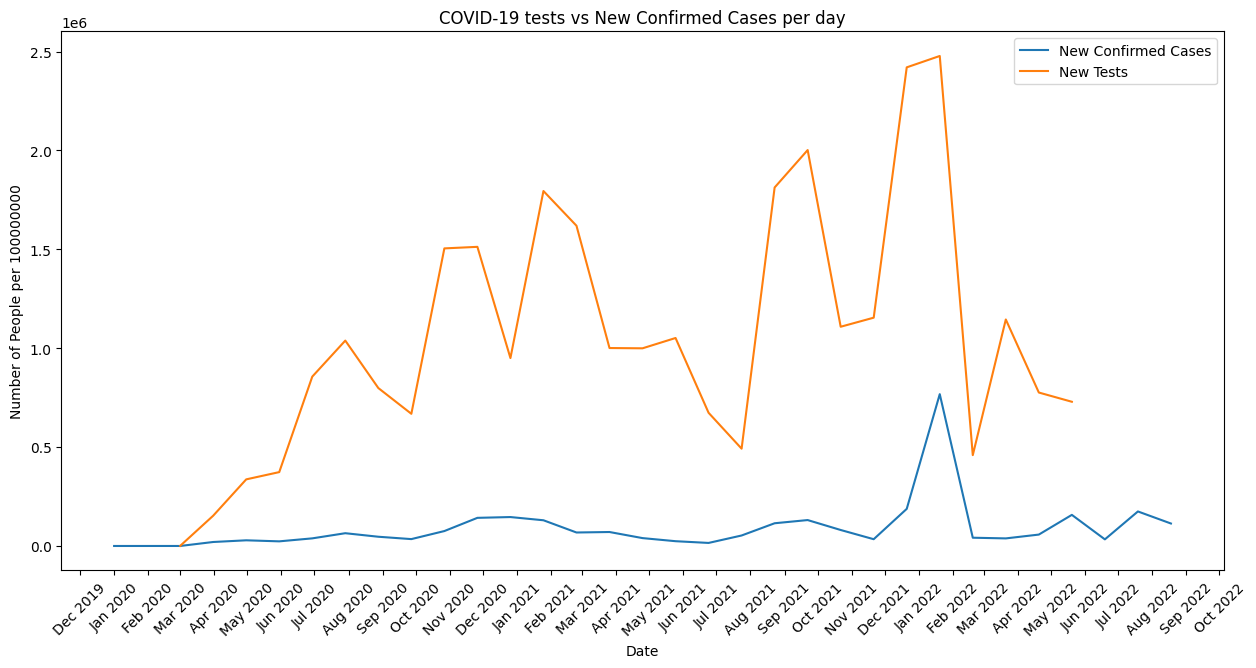

In [64]:
infections['date'] = pd.to_datetime(infections['date'])
every_month_infected = infections.iloc[::30, :]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7))  # Set figure size

# Plotting the data
ax.plot(every_month_infected['date'], every_month_infected['new_confirmed'], label='New Confirmed Cases')
ax.plot(every_month_infected['date'], every_month_infected['new_tested'], label='New Tests')

# Set the x-axis major locator and formatter
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of People per 1000000')
ax.set_title('COVID-19 tests vs New Confirmed Cases per day')

# Add a legend
ax.legend()

# Show the plot
plt.show()

Above is the graph plotting Covid-19 logged tests versus new cases, as we can see test cases had spikes around July 2020, October 2020, January 2021, September 2021, and January 2022. Comparatively, the number of confirmed cases had a steady rate of new cases with one spike at January 2022, this is in line with the large spike in tests as this was the time frame where the Delta variant of the virus was detected, which was more transmissable than the previous variant. While the spikes in testing do not directly correlate with the seemingly consistent trend of new cases, they do correllate to event that happened at the same time. The test spike came at the same time when Texas and many other southern states started their own COVID compliance testing and mandates. The spike in test cases in October 2020 also correlates with former President Trump testing positive for COVID.

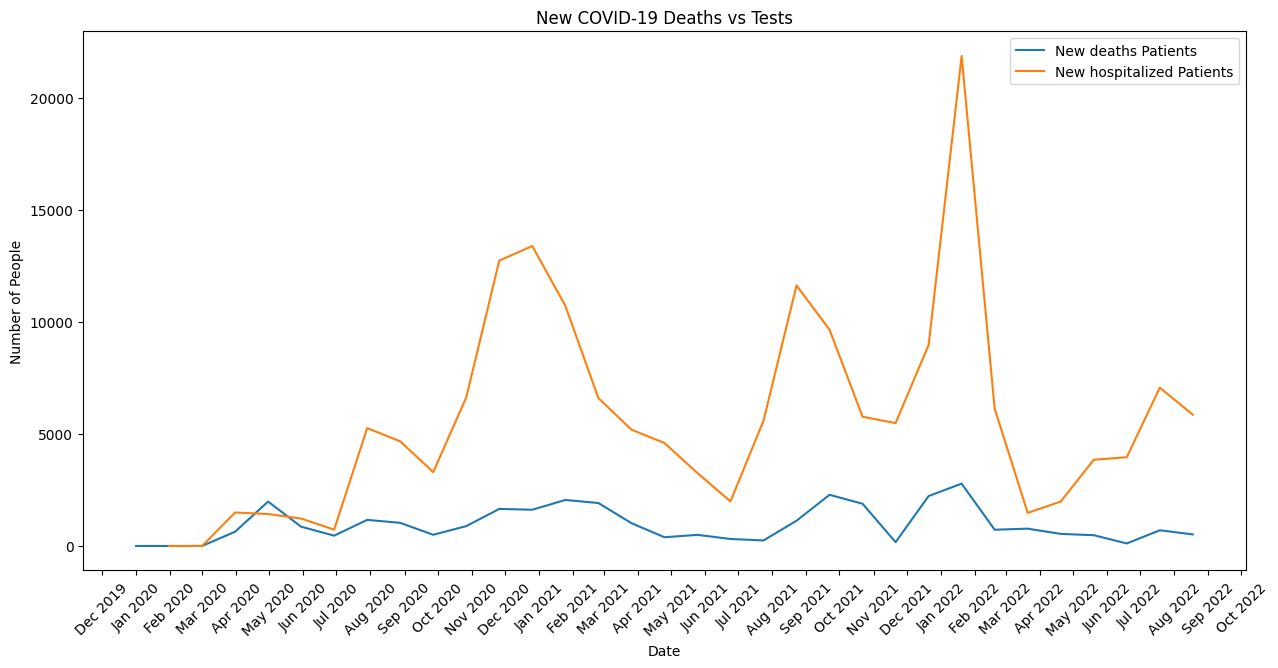

In [102]:
infections['date'] = pd.to_datetime(infections['date'])
every_month_infected = infections.iloc[::30, :]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7))  # Set figure size

# Plotting the data
ax.plot(every_month_infected['date'], every_month_infected['new_deceased'], label='New deaths Patients')
ax.plot(every_month_infected['date'], every_month_infected['new_hospitalized_patients'], label='New hospitalized Patients')

# Set the x-axis major locator and formatter
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of People')
ax.set_title('New COVID-19 Deaths vs Tests')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In the graph above we see the correlation between hospitalized patients and patient deaths. We see similar similar spikes as the previous plot, with peaks at December 2020/January 2021, August 2021, and January/Febuary 2022. In December 2020 and January 2021, the United States FDA approved the COVID vaccine for public use. The August 2021 peak correlates with the reopening of many colleges and workplaces to hybrid/in-person. And the January 2022 peak correlates to the rise of the Delta variant within the United States.

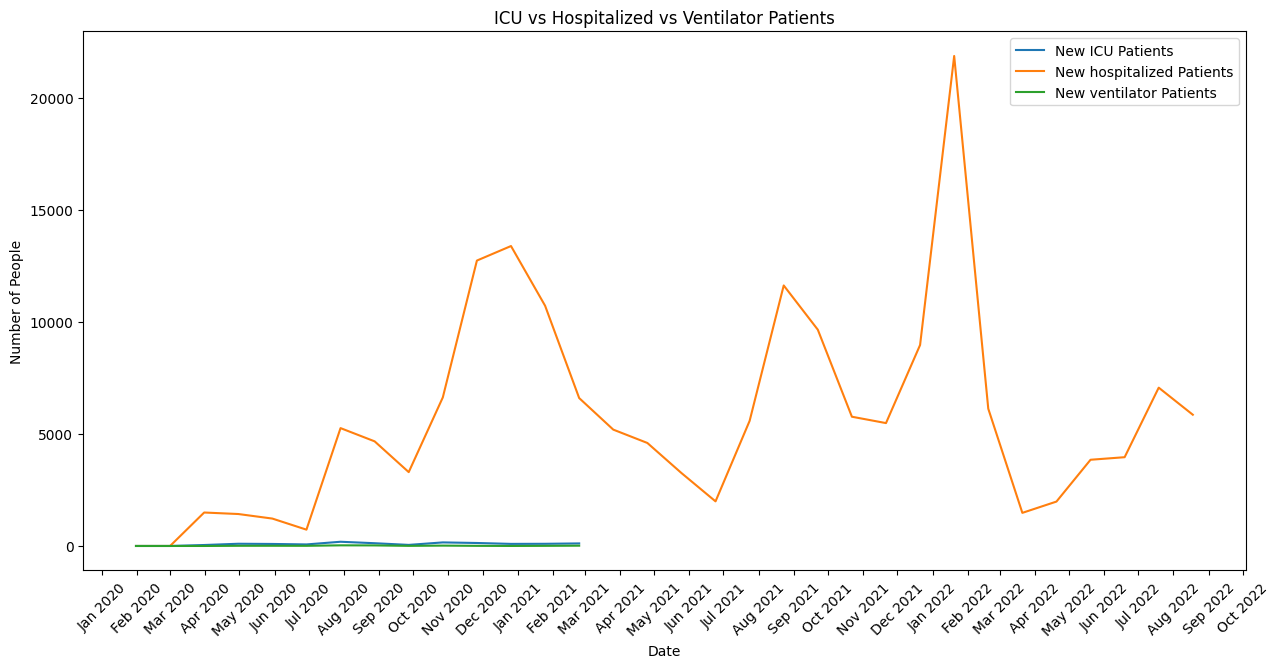

In [66]:
infections['date'] = pd.to_datetime(infections['date'])
every_month_infected = infections.iloc[::30, :]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7))  # Set figure size

# Plotting the data
ax.plot(every_month_infected['date'], every_month_infected['new_intensive_care_patients'], label='New ICU Patients')
ax.plot(every_month_infected['date'], every_month_infected['new_hospitalized_patients'], label='New hospitalized Patients')
ax.plot(every_month_infected['date'], every_month_infected['new_ventilator_patients'], label='New ventilator Patients')
# Set the x-axis major locator and formatter
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of People')
ax.set_title('ICU vs Hospitalized vs Ventilator Patients')

# Add a legend
ax.legend()

# Show the plot
plt.show()

This graph allows us to visualize the different levels of care within the United States, we can see many things. First, data was not tracked for ventilator and ICU COVID patients post February 2021, when the first vaccines were made available to the public. Additionally we can see from this plot that the scope of ICU and ventilator patients is much lower than the general hospitalized patient count, leading to the graph below.

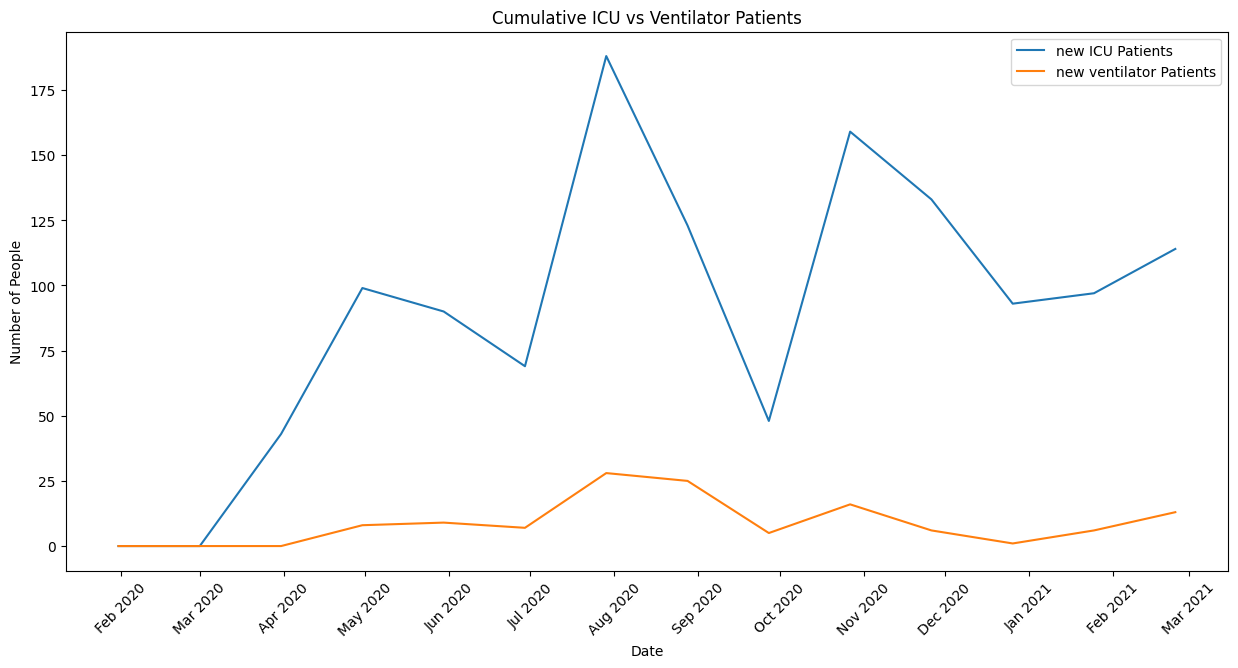

In [103]:
infections['date'] = pd.to_datetime(infections['date'])
every_month_infected = infections.iloc[::30, :]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7))  # Set figure size

# Plotting the data
ax.plot(every_month_infected['date'], every_month_infected['new_intensive_care_patients'], label='new ICU Patients')
ax.plot(every_month_infected['date'], every_month_infected['new_ventilator_patients'], label='new ventilator Patients')
# Set the x-axis major locator and formatter
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of People')
ax.set_title('Cumulative ICU vs Ventilator Patients')

# Add a legend
ax.legend()

# Show the plot
plt.show()

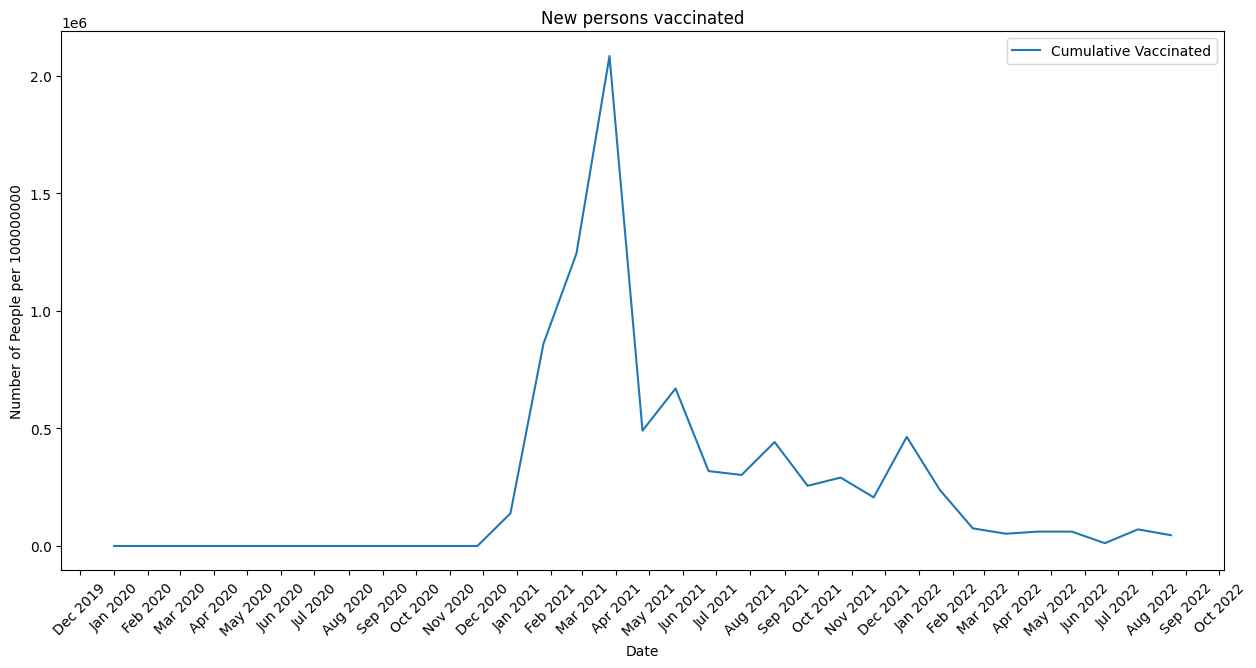

In [52]:
vaccines['date'] = pd.to_datetime(vaccines['date'])
every_month_vaccinated = vaccines.iloc[::30, :]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7))  # Set figure size

# Plotting the data
ax.plot(every_month_vaccinated['date'], every_month_vaccinated['new_persons_vaccinated'], label='new vaccinations')

# Set the x-axis major locator and formatter
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of People per 100000000')
ax.set_title('New persons vaccinated')

# Add a legend
ax.legend()

# Show the plot
plt.show()

The plot above shows us how many new people were vaccinated per month, the trends fit our understanding as there is a massive spike where the vaccine was available to the public, spikes at the 2/3 month time frame for the second shot, and one more spike at the time of the Delta variant emergence. These relationships are reinforced by the following 2 graphs.

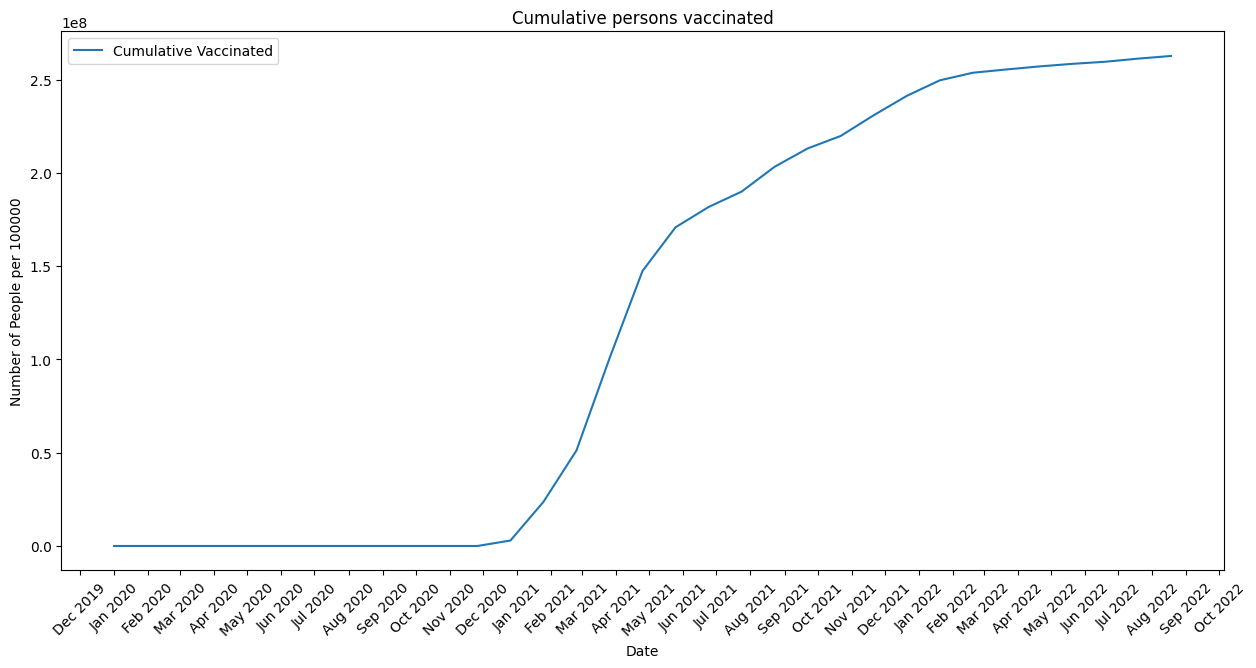

In [51]:
vaccines['date'] = pd.to_datetime(vaccines['date'])
every_month_vaccinated = vaccines.iloc[::30, :]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7))  # Set figure size

# Plotting the data
ax.plot(every_month_vaccinated['date'], every_month_vaccinated['cumulative_persons_vaccinated'], label='Cumulative Vaccinated')

# Set the x-axis major locator and formatter
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of People per 100000000')
ax.set_title('Cumulative persons vaccinated')

# Add a legend
ax.legend()

# Show the plot
plt.show()

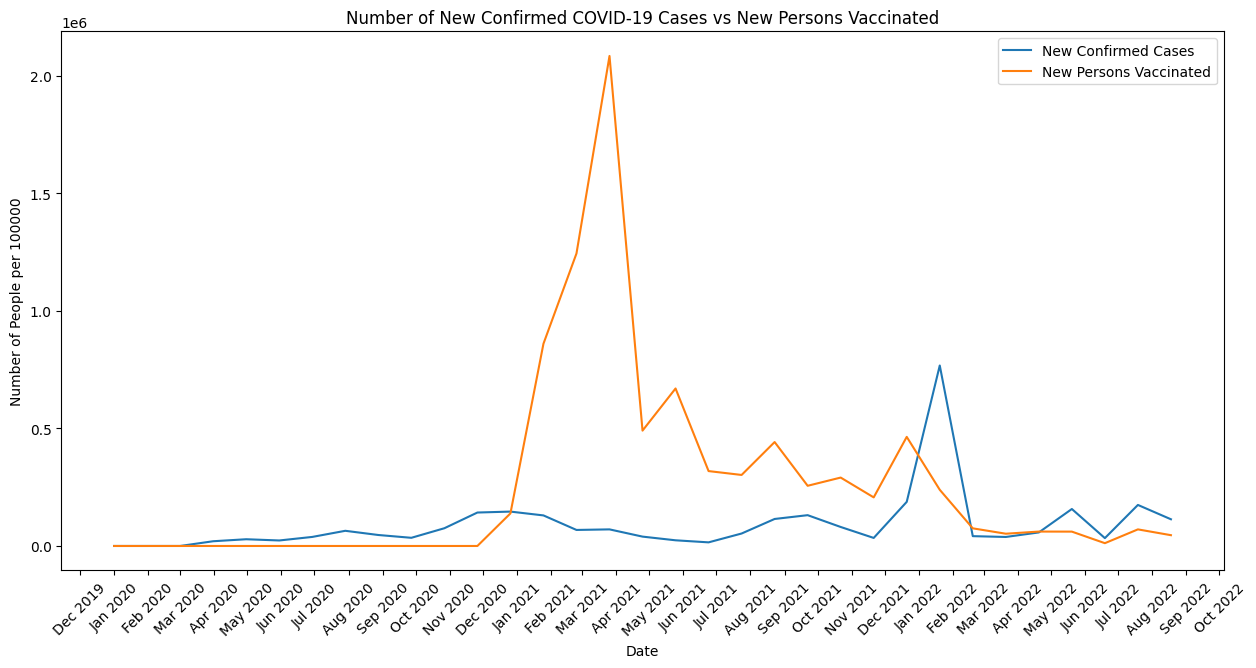

In [50]:
infections['date'] = pd.to_datetime(infections['date'])
vaccines['date'] = pd.to_datetime(vaccines['date'])

every_month_infected = infections.iloc[::30, :]
every_month_vaccinated = vaccines.iloc[::30, :]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7))  # Set figure size

# Plotting the data
ax.plot(every_month_infected['date'], every_month_infected['new_confirmed'], label='New Confirmed Cases')
ax.plot(every_month_vaccinated['date'], every_month_vaccinated['new_persons_vaccinated'], label='New Persons Vaccinated')

# Set the x-axis major locator and formatter
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set major ticks to every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format the ticks as 'Month Year'

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of People per 100000')
ax.set_title('Number of New Confirmed COVID-19 Cases vs New Persons Vaccinated')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [106]:
last_record_infection = infections.tail(1)
test_array = infections.loc[:,'new_tested']
c = 0
tested = 0
for x in test_array:
    c = c + 1
    if math.isnan(x) == False:
        tested = tested+x

hos_array = infections.loc[:,'new_hospitalized_patients']
hosp = 0
for x in hos_array:
    if math.isnan(x) == False:
        hosp = hosp+x

icu_array = infections.loc[:,'new_intensive_care_patients']
icu = 0
for x in icu_array:
    if math.isnan(x) == False:
        icu = icu+x

vent_array = infections.loc[:,'new_ventilator_patients']
vent = 0
for x in vent_array:
    if math.isnan(x) == False:
        vent = vent+x

dead_array = infections.loc[:,'new_deceased']
deceased = 0
for x in dead_array:
    if math.isnan(x) == False:
        deceased = deceased+x

print("Total Tests: ",  tested, "Avg daily tests: ", (tested/c))
print("Total Hospitalizations: ",  hosp, "Avg daily hospitalizations: ", (hosp/c))
print("Total ICU Patients: ",  icu, "Avg daily ICU patients: ", (icu/c))
print("Total Ventilator Patients: ",  vent, "Avg daily ventilator patients: ", (vent/c))
print("Total Deaths: ",  deceased, "Avg daily deaths: ", (deceased/c))

988
Total Tests:  912769124.0 Avg daily tests:  923855.3886639676
Total Hospitalizations:  5678344.0 Avg daily hospitalizations:  5747.311740890688
Total ICU Patients:  45475.0 Avg daily ICU patients:  46.02732793522267
Total Ventilator Patients:  4281.0 Avg daily ventilator patients:  4.332995951417004
Total Deaths:  988028.0 Avg daily deaths:  1000.0283400809717


In [91]:
last_record_vacc = vaccines.tail(1) 
print("People vaccinated: ", last_record_vacc.iloc[0]['cumulative_persons_vaccinated'])
print("People fully vaccinated: ", last_record_vacc.iloc[0]['cumulative_persons_fully_vaccinated'])
print("Vaccine doses administered: ", last_record_vacc.iloc[0]['cumulative_vaccine_doses_administered'])

People vaccinated:  263103582.0
People fully vaccinated:  224367691.0
Vaccine doses administered:  610686563.0


## Analysis, Hypothesis Testing, Machine Learning
In this phase, we will perform modeling techniques in order to create a predictive model based on our data. These models will aim to tell us how another COVID-like virus would spread and the trends in testing, hospitalizations, and vaccines. 

coefficient of determination: 0.08593496866891237


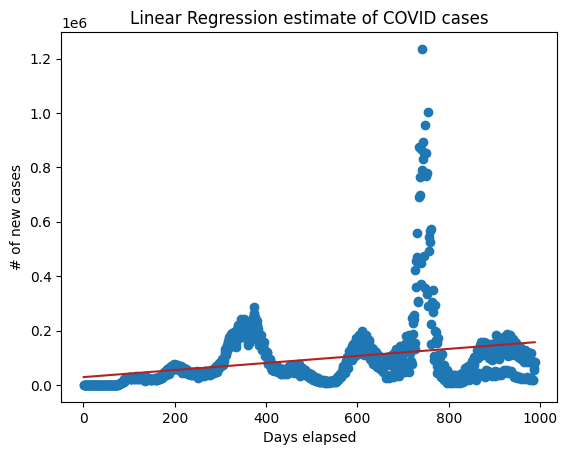

In [138]:
model = LinearRegression()
x_val = []
c = 0
date_array = data.loc[:, 'date']
for x in date_array:
    c = c+1
    x_val.append(c)
x_val = x_val[:len(x_val)-3]
x_fit = np.array(x_val)
x_fit = x_fit.reshape(-1,1)
y_val = infections.loc[:, 'new_confirmed']
y_fit = np.array(y_val)
y_fit = y_fit.reshape(-1,1)
model.fit(x_fit, y_fit)

r_sq = model.score(x_fit, y_fit)
print(f"coefficient of determination: {r_sq}")
plt.scatter(x_fit, y_fit)
plt.plot(x_fit, model.predict(x_fit), color = 'firebrick')
plt.title('Linear Regression estimate of COVID cases')
plt.xlabel('Days elapsed')
plt.ylabel('# of new cases')
plt.show()

Here we can see that after trying to fit a linear regression model on the daily number of confirmed cases, the R value shows us that there is virtually no correlation to be had within this plot. However, we can repeat this process with other regression models to see if there is one that suits the data best. 

Coefficient of determination (R²): 0.14157913921460663


C:\Users\13018\AppData\Local\Temp\ipykernel_20796\1890135673.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x_fit), max(x_fit), 0.1)


ValueError: X has 1 features, but LinearRegression is expecting 5 features as input.

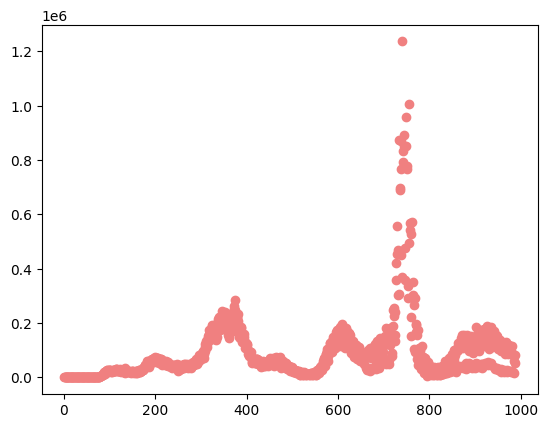

In [143]:
x_val = []
c = 0
date_array = data.loc[:, 'date']
for x in date_array:
    c = c+1
    x_val.append(c)

x_val = x_val[:len(x_val)-3]
x_fit = np.array(x_val)
x_fit = x_fit.reshape(-1,1)
y_val = infections.loc[:, 'new_confirmed']
y_fit = []
for number in infections.loc[:, 'new_confirmed']:
    y_fit.append(number)
y_fit = np.array(y_fit)
y_fit = y_fit.reshape(-1,1)
pr = PolynomialFeatures(degree=4)
X_poly = pr.fit_transform(x_fit)

# Fit the polynomial regression model
lr_2 = LinearRegression()
lr_2.fit(X_poly, y_fit)

# Calculate the coefficient of determination R^2
r_sq2 = lr_2.score(X_poly, y_fit)
print(f"Coefficient of determination (R²): {r_sq2}")

X_grid = np.arange(min(x_fit), max(x_fit), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_fit, y_fit, color = 'lightcoral')
plt.plot(x_fit, lr_2.predict(y_fit), color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()

Here we are given a slightly better R score, making it a better fit than the linear regression, but still not a great fit from the model. 

Amplitude (A): -83138.32664979459
Frequency (B): 0.003317821168781464
Phase shift (C): 2.384818679024962
Vertical shift (D): 53775.642591091804
Coefficient of determination (R²): 0.11877399112326126


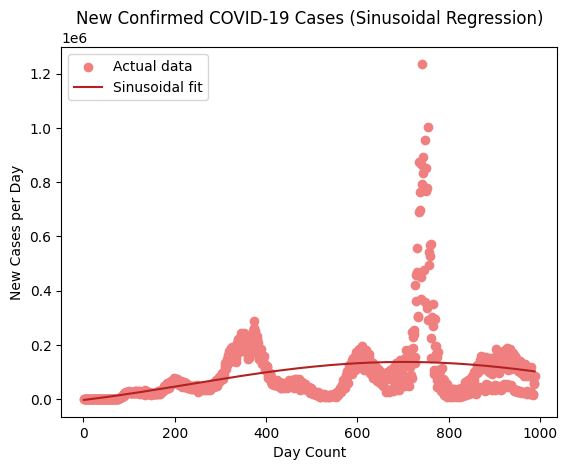

In [146]:
x_val = []
c = 0
date_array = data.loc[:, 'date']
for x in date_array:
    c += 1
    x_val.append(c)

# Remove the last 3 values from x_val to match the y_val length
x_val = x_val[:len(x_val) - 3]

# Prepare x_fit as a numpy array and reshape it
x_fit = np.array(x_val)

# Prepare y_fit from 'new_confirmed' column
y_fit = infections.loc[:, 'new_confirmed'].values

# Define the sinusoidal function
def sinusoidal(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# Initial guess for the parameters [A, B, C, D]
initial_guess = [max(y_fit) - min(y_fit), 2 * np.pi / len(x_fit), 0, np.mean(y_fit)]

# Fit the sinusoidal function to the data
params, params_covariance = curve_fit(sinusoidal, x_fit, y_fit, p0=initial_guess)

# Print the fitted parameters
print(f"Amplitude (A): {params[0]}")
print(f"Frequency (B): {params[1]}")
print(f"Phase shift (C): {params[2]}")
print(f"Vertical shift (D): {params[3]}")

y_pred = sinusoidal(x_fit, *params)

# Calculate the coefficient of determination R²
ss_res = np.sum((y_fit - y_pred) ** 2)
ss_tot = np.sum((y_fit - np.mean(y_fit)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"Coefficient of determination (R²): {r_squared}")

# Create a smooth line for the fitted function
x_smooth = np.linspace(min(x_fit), max(x_fit), 1000)
y_smooth = sinusoidal(x_smooth, *params)

# Plot the actual data points
plt.scatter(x_fit, y_fit, color='lightcoral', label='Actual data')

# Plot the sinusoidal regression line
plt.plot(x_smooth, y_smooth, color='firebrick', label='Sinusoidal fit')

# Add labels, title, and legend
plt.title('New Confirmed COVID-19 Cases (Sinusoidal Regression)')
plt.xlabel('Day Count')
plt.ylabel('New Cases per Day')
plt.legend()
plt.show()

Finally with the sinusoidal regression, we have a model that fits slightly worse than the polynomial regression, with an R value of .118

## Interpertation
Based on the models that we have created as well as the data plot we have analyzed, we can draw a few conclusions:
1 - The COVID-19 pandemic testing and cases were directly influenced by societal events that were happening at the same time.
2 - Hospitalizations and cases were halted by the emergence of the vaccine, but variants caused large upticks before more vaccines were created to counteract them
3 - It would be almost impossible to predict how another COVID like virus would spread through the united states, as well as predict which months have the highest risk